Did LHS 2686 have a flare in the COS spectrum?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d
from scipy.io.idl import readsav


import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from astropy.io.votable import parse


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [12]:
cospath = '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/COS/'
x1ds = glob.glob('{}*x1d.fits'.format(cospath))
x1ds

['/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/COS/ldlm33unq_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/COS/ldlm33uxq_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/COS/ldlm33v0q_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/COS/ldlm33v2q_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/COS/ldlm33v4q_x1d.fits']

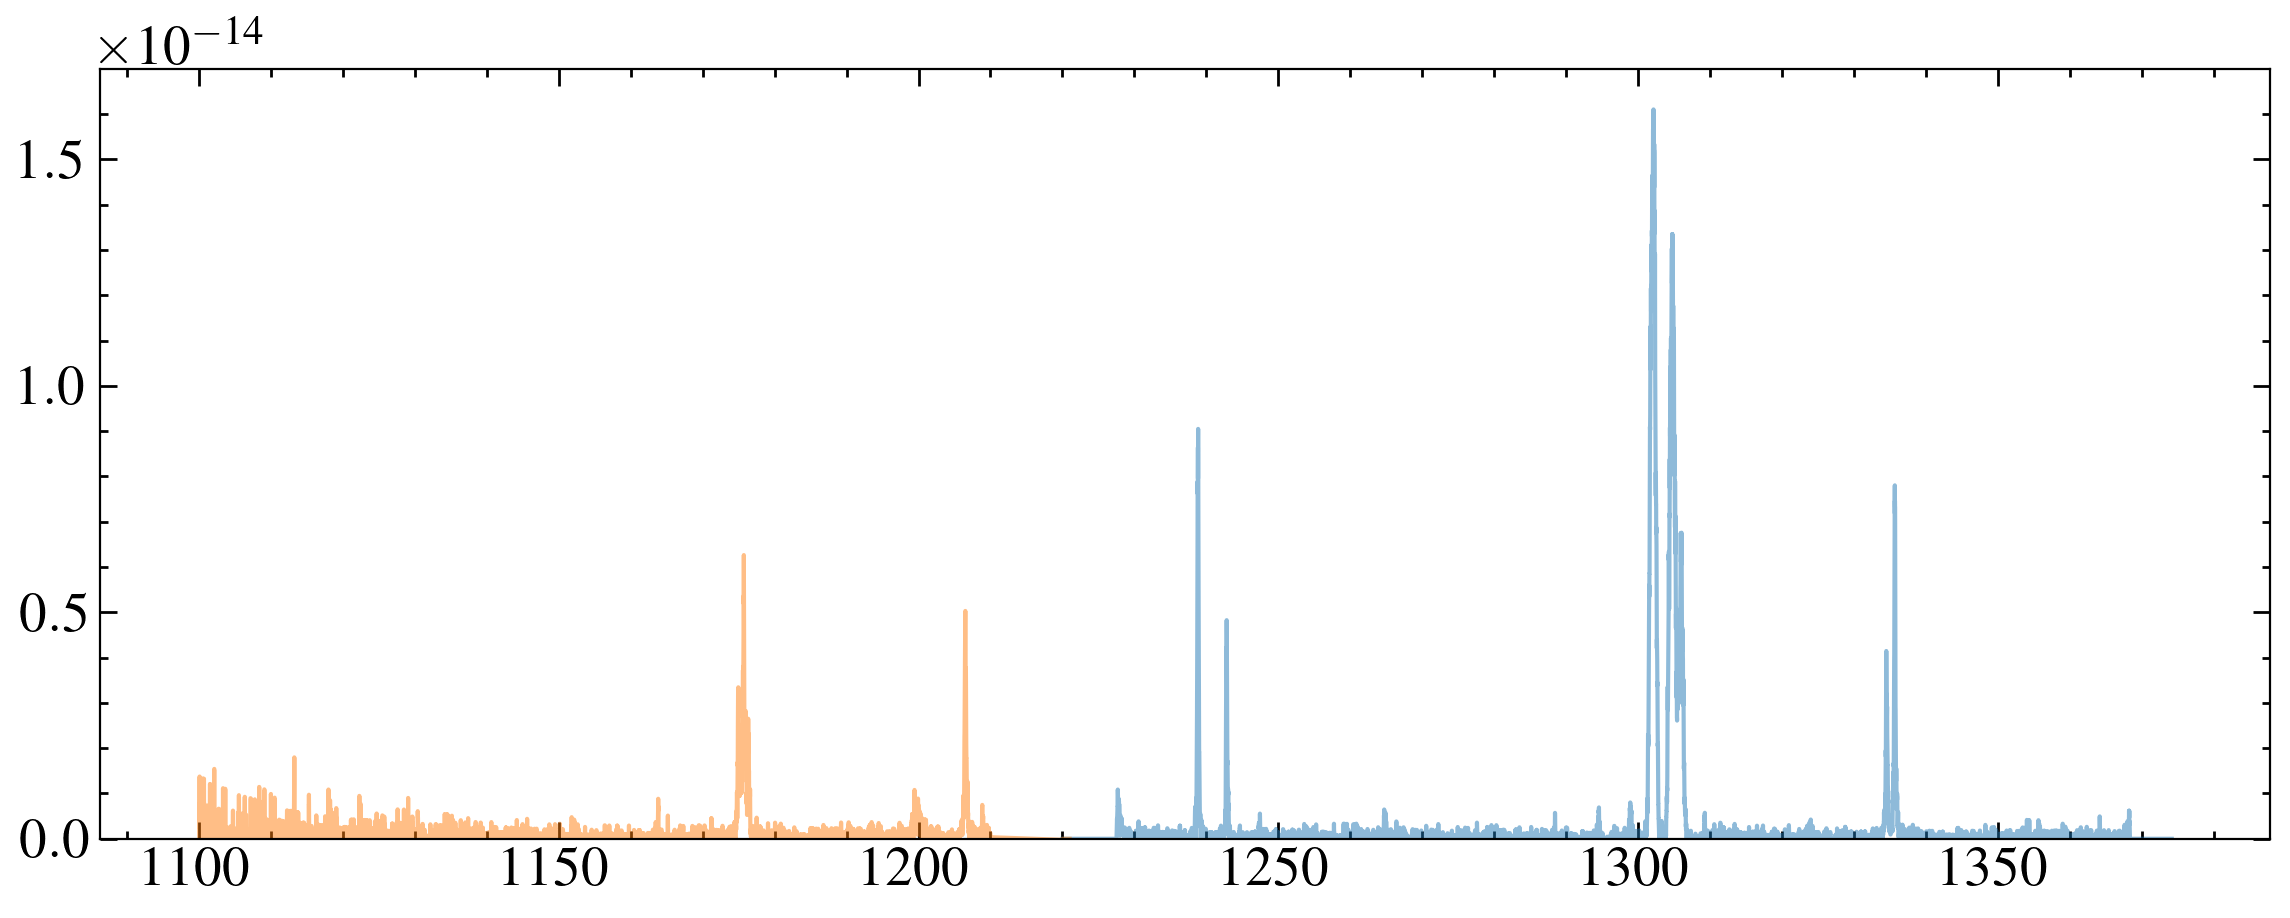

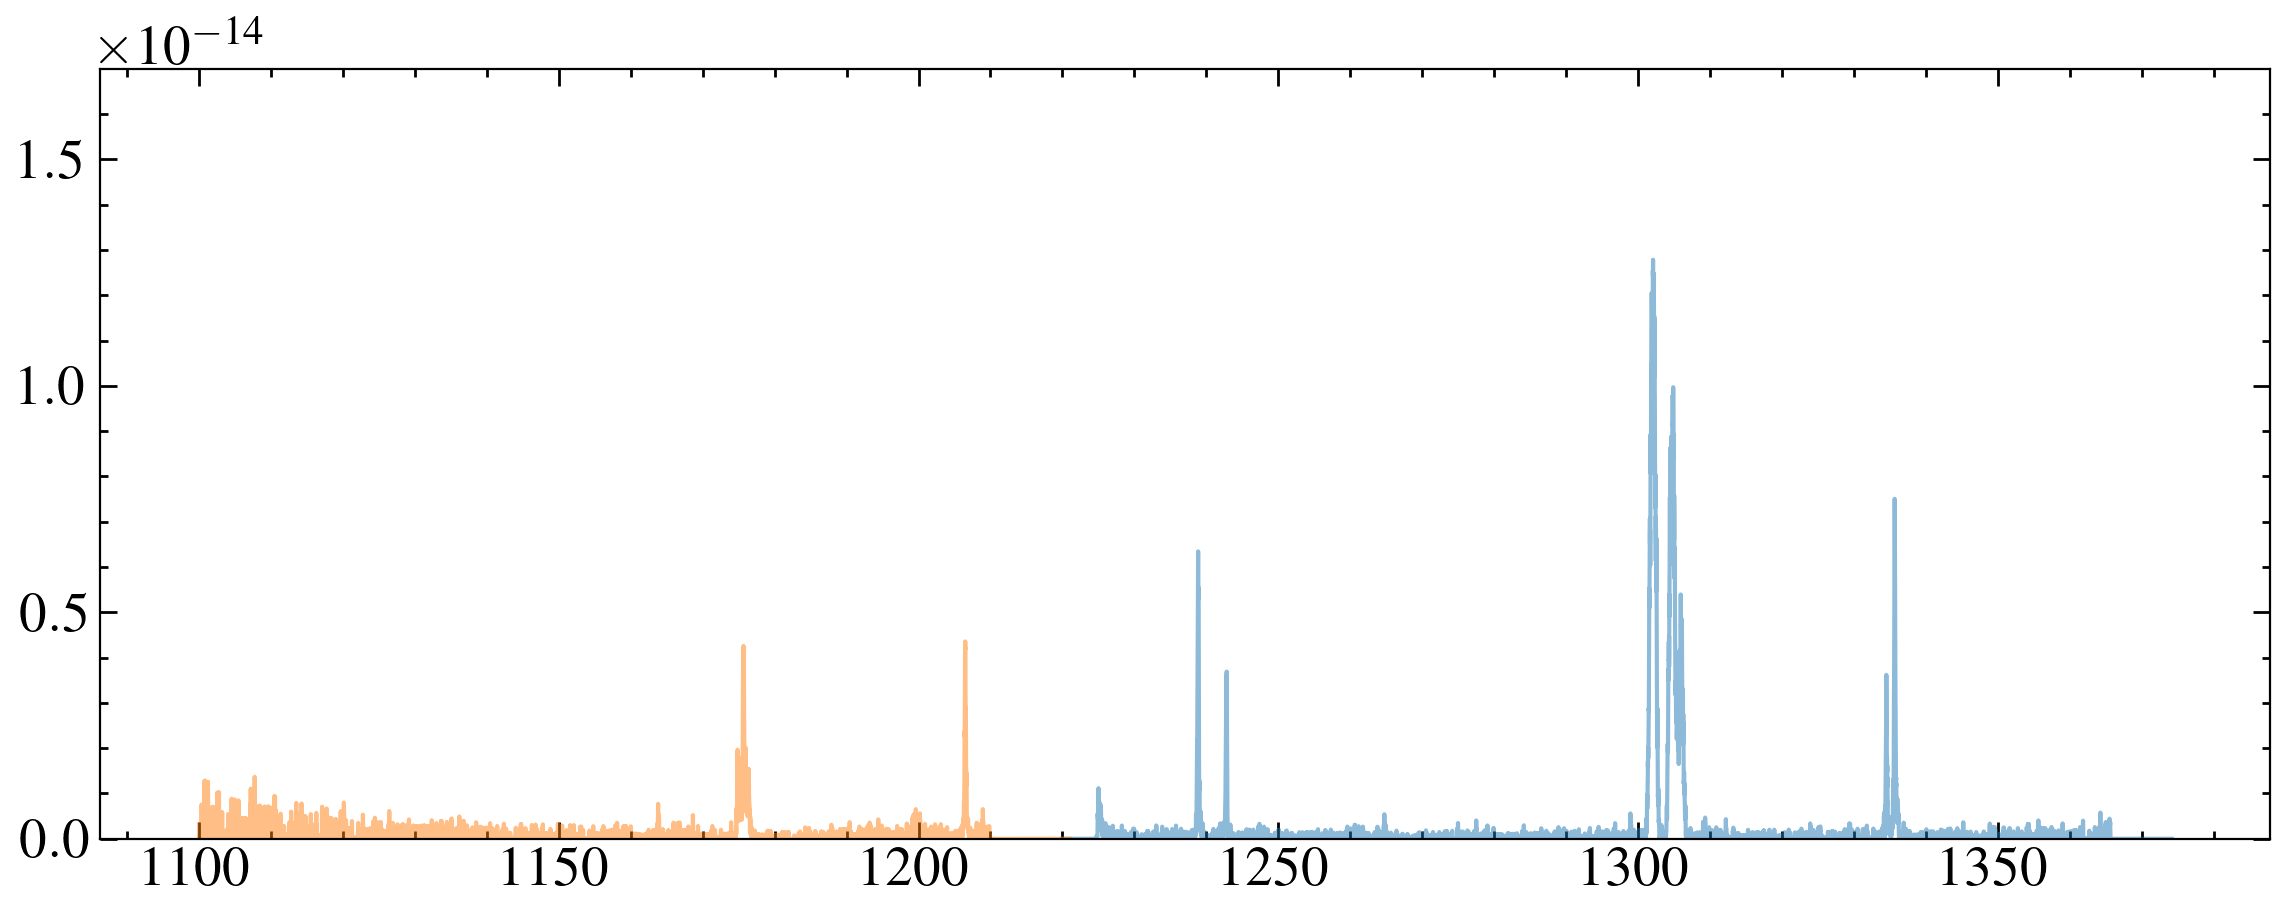

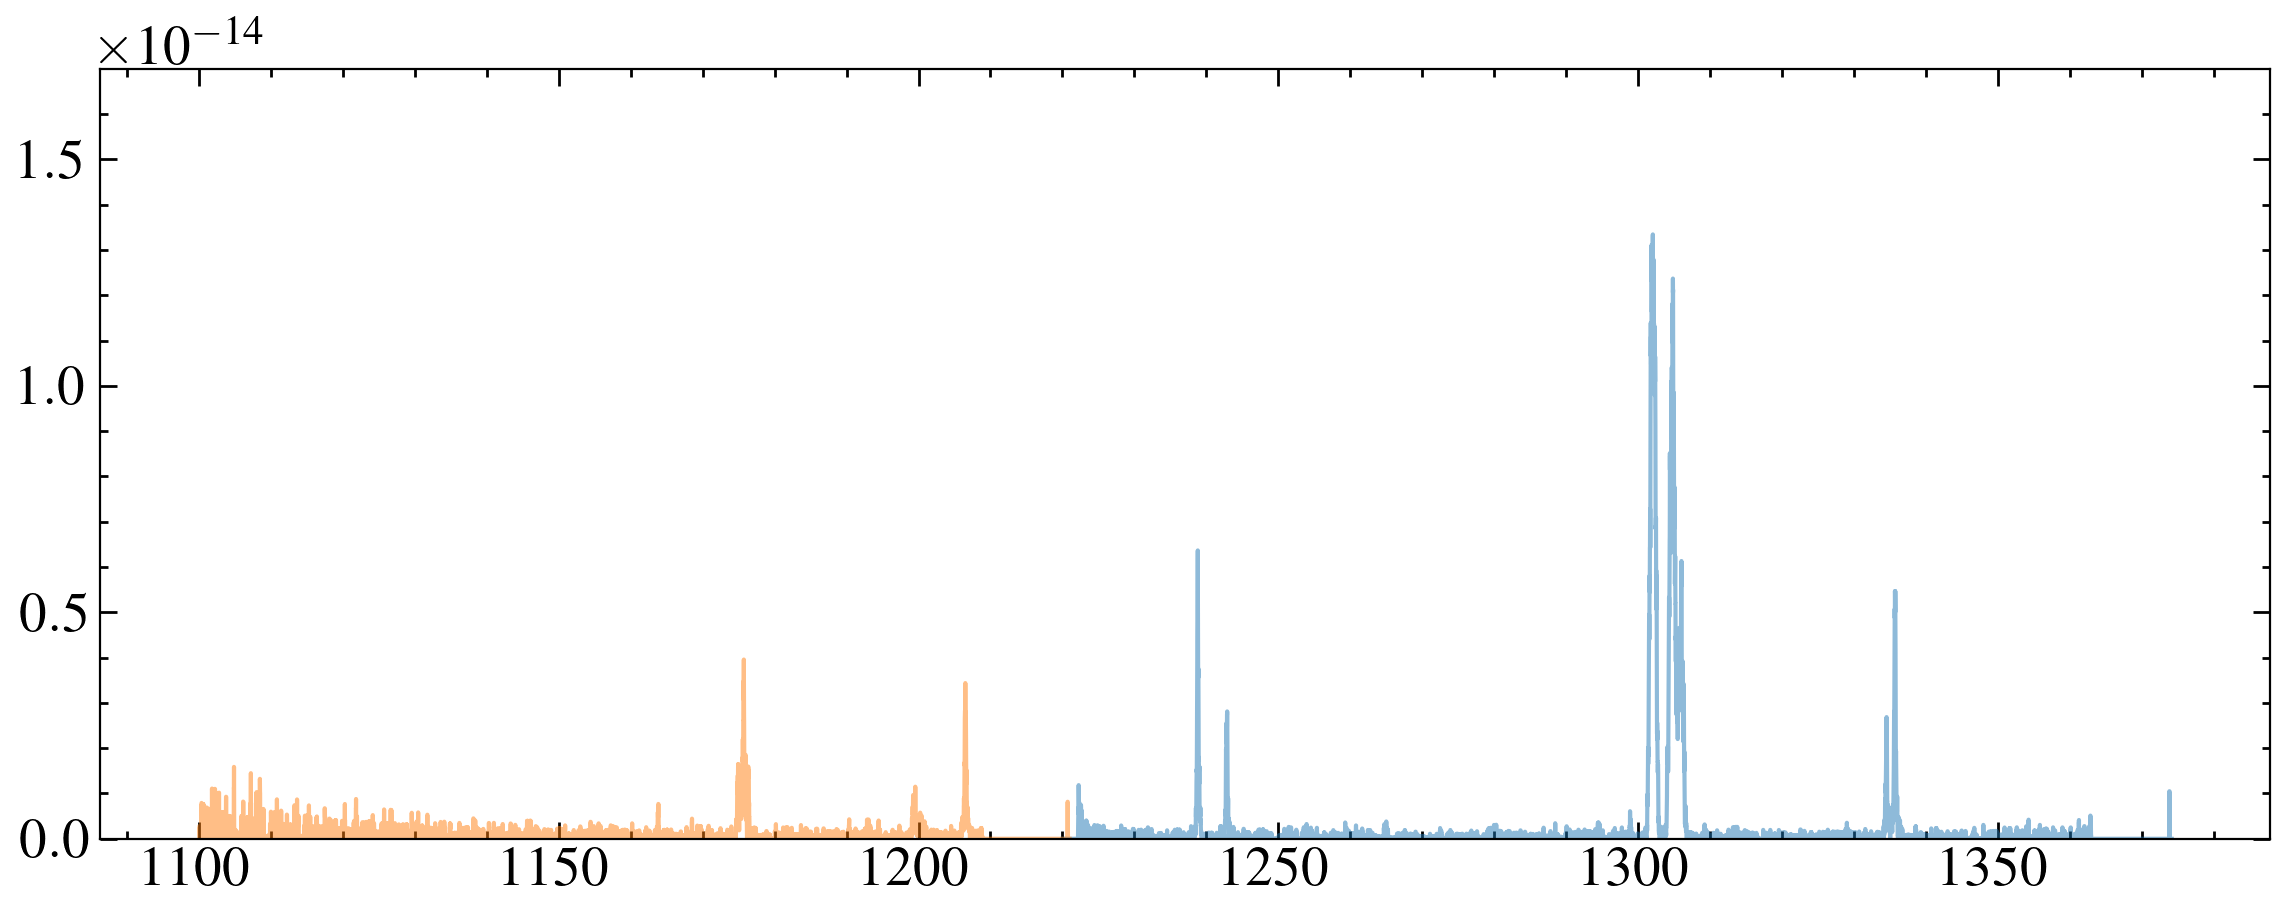

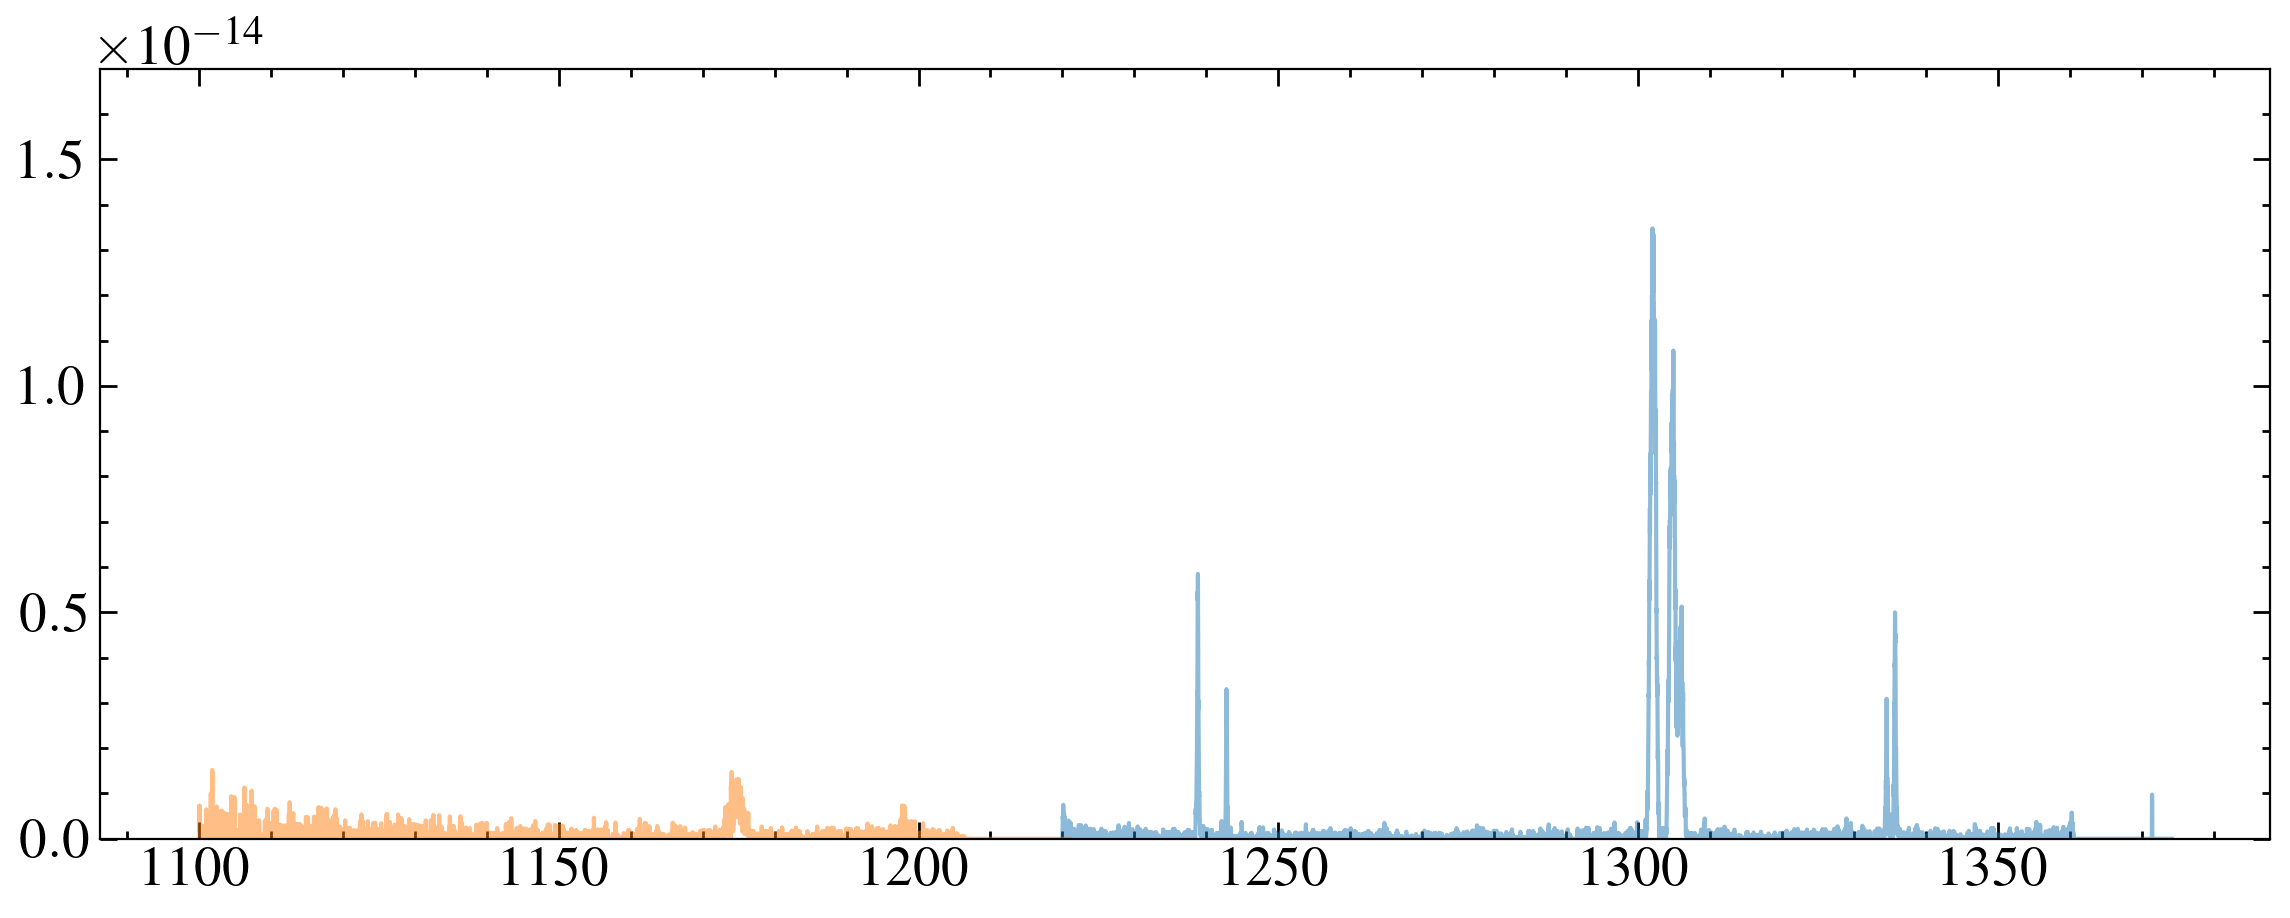

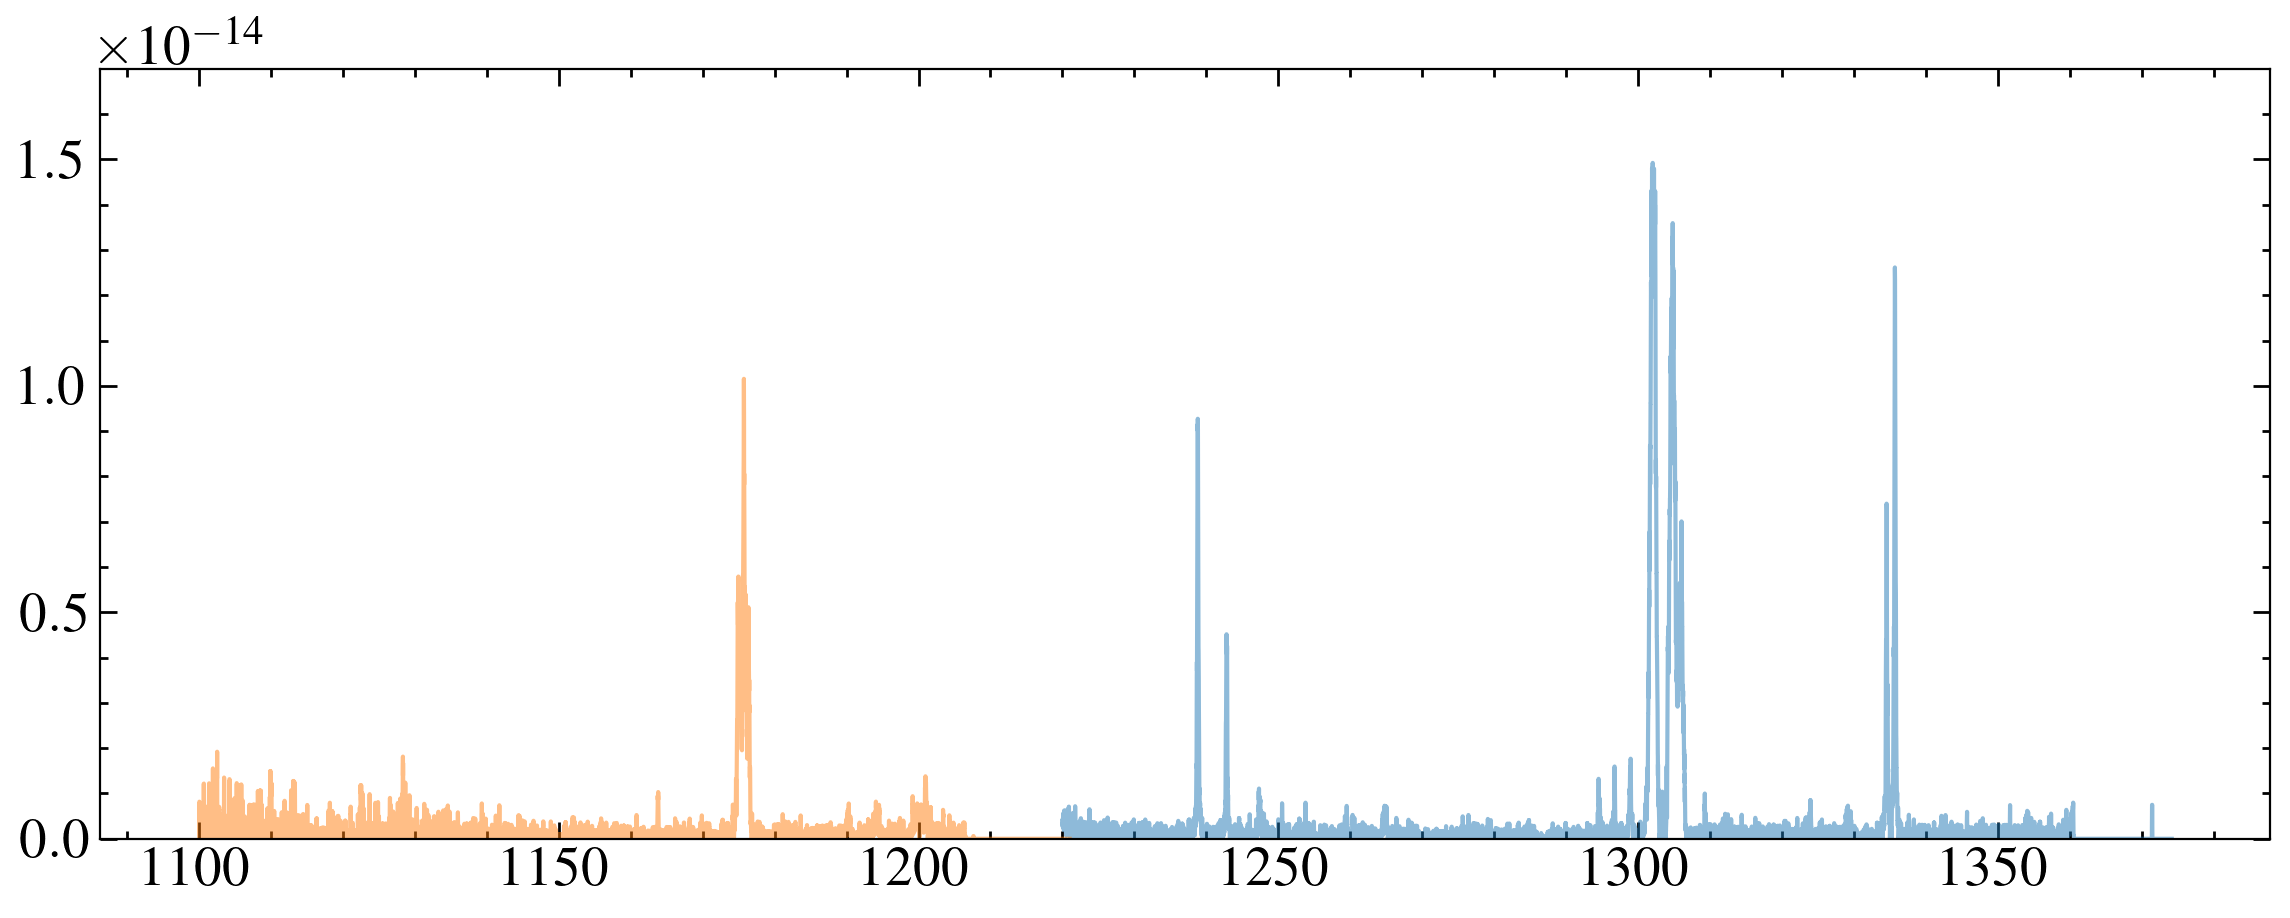

In [10]:
smooth = 5

for x in x1ds:
    datas = fits.getdata(x, 1)
    for data in datas:
        
        # data = fits.getdata(cos[0], 1)
        w, f, e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
        mask = (w > 1100) & (w < 1210) | (w > 1220) #mask lya
        w, f, e = w[mask], f[mask], e[mask]
        f = convolve(f,Box1DKernel(smooth))
        e = convolve(e,Box1DKernel(smooth))/(smooth**0.5)
        
        plt.plot(w,f, alpha=0.5)
    
    plt.ylim(0, 1.7e-14)
    plt.show()

No? G140M looks bad

In [15]:
spath = '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/STIS/'
x1ds = np.hstack((glob.glob('{}*x1d.fits'.format(spath)), glob.glob('{}*sx1.fits'.format(spath) )))
x1ds

array(['/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/STIS/odlm34020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/STIS/odlm34030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/STIS/odlm34040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/STIS/odlm34050_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/STIS/odlm34060_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/STIS/odlm35020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/STIS/odlm35030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/STIS/odlm35040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/STIS/odlm35050_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/STIS/odlm35060_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/data/lhs2686/STIS/odlm34010_sx1.fits',

384.1901
odlm34030


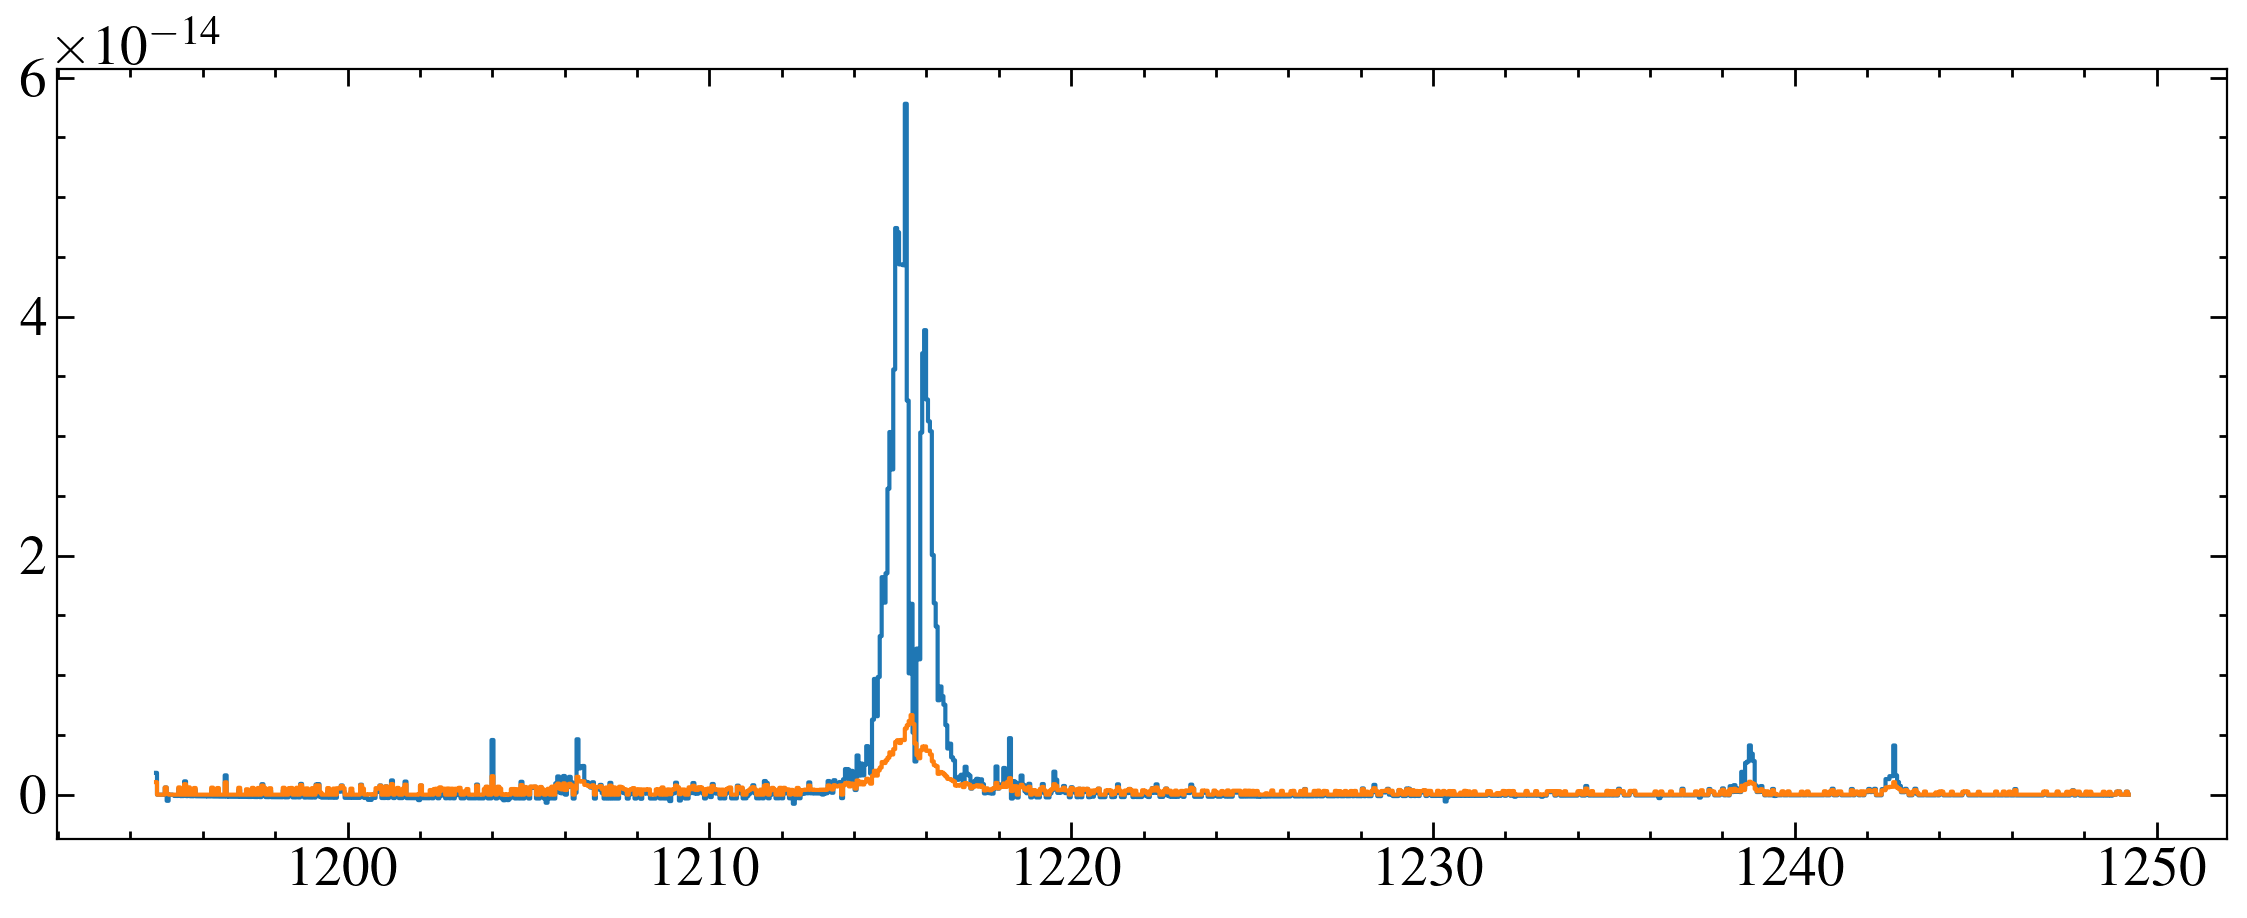

384.46484
odlm34040


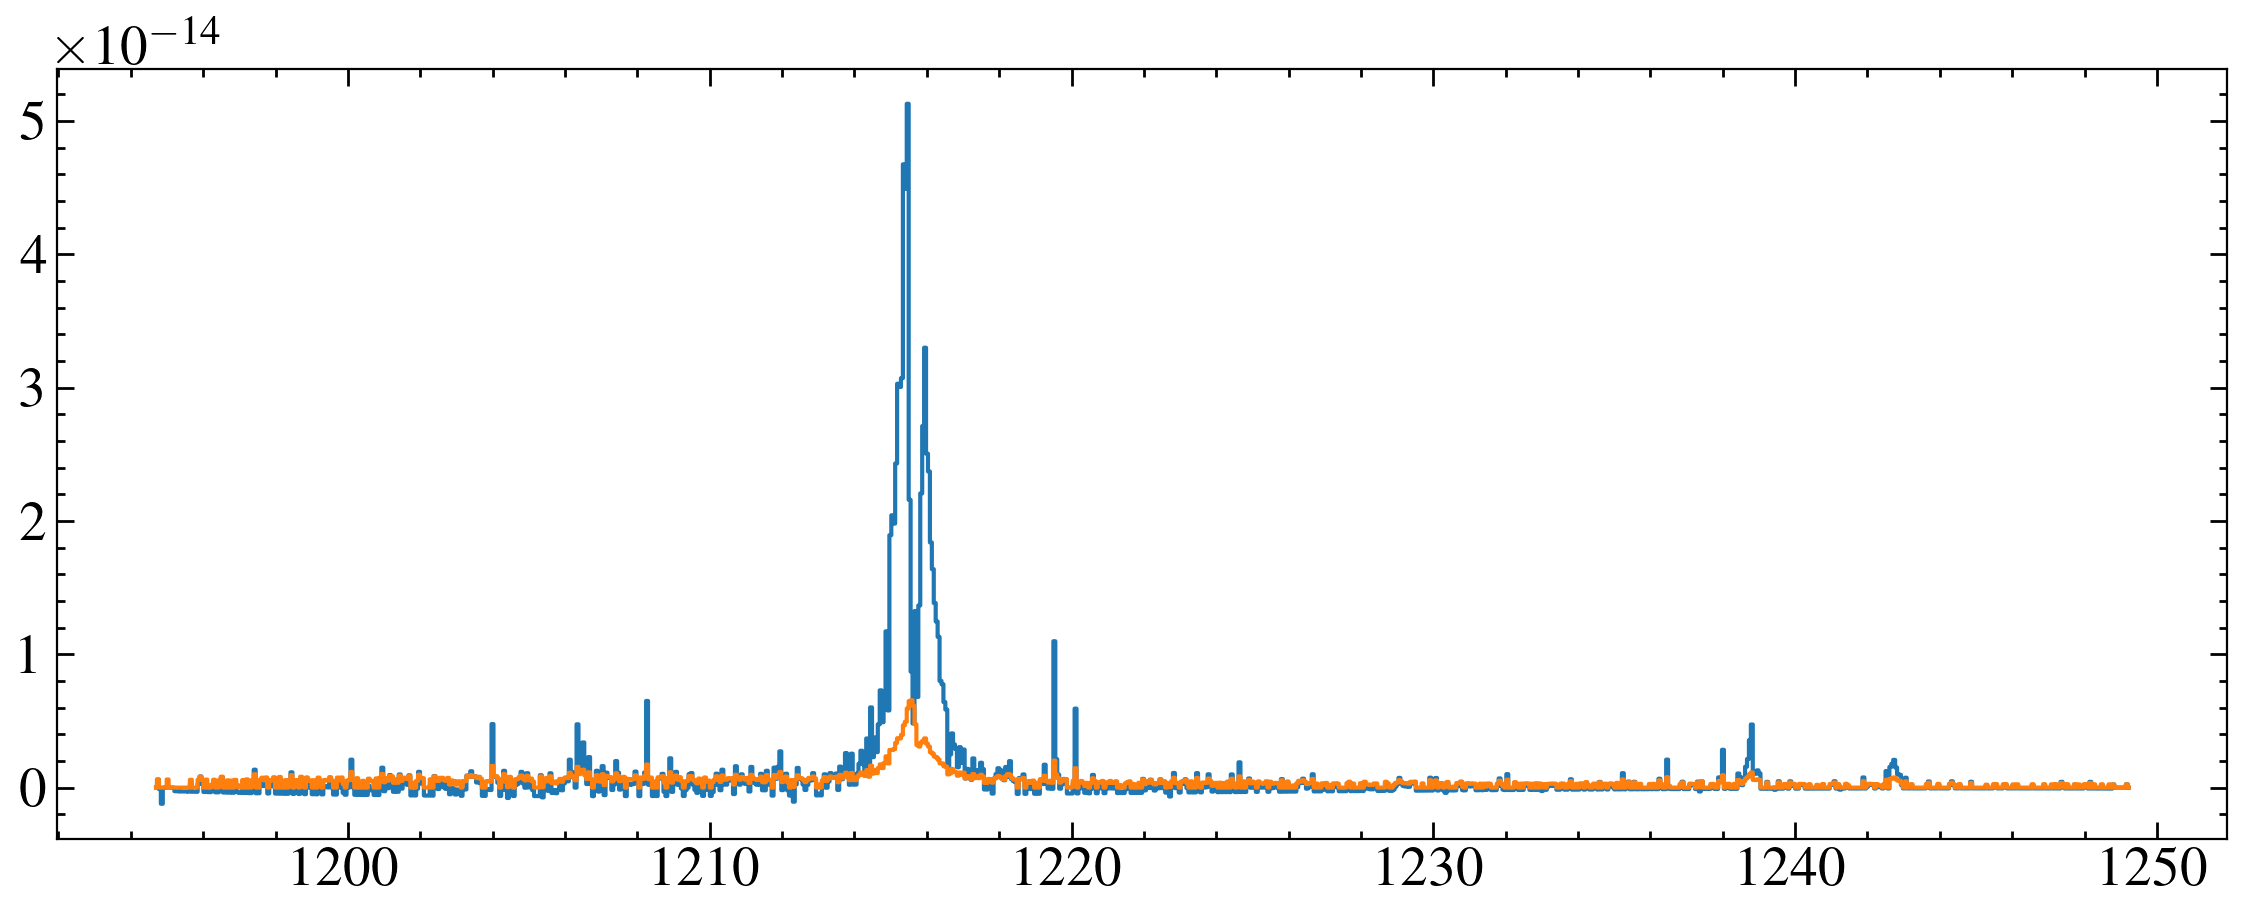

383.77097
odlm35030


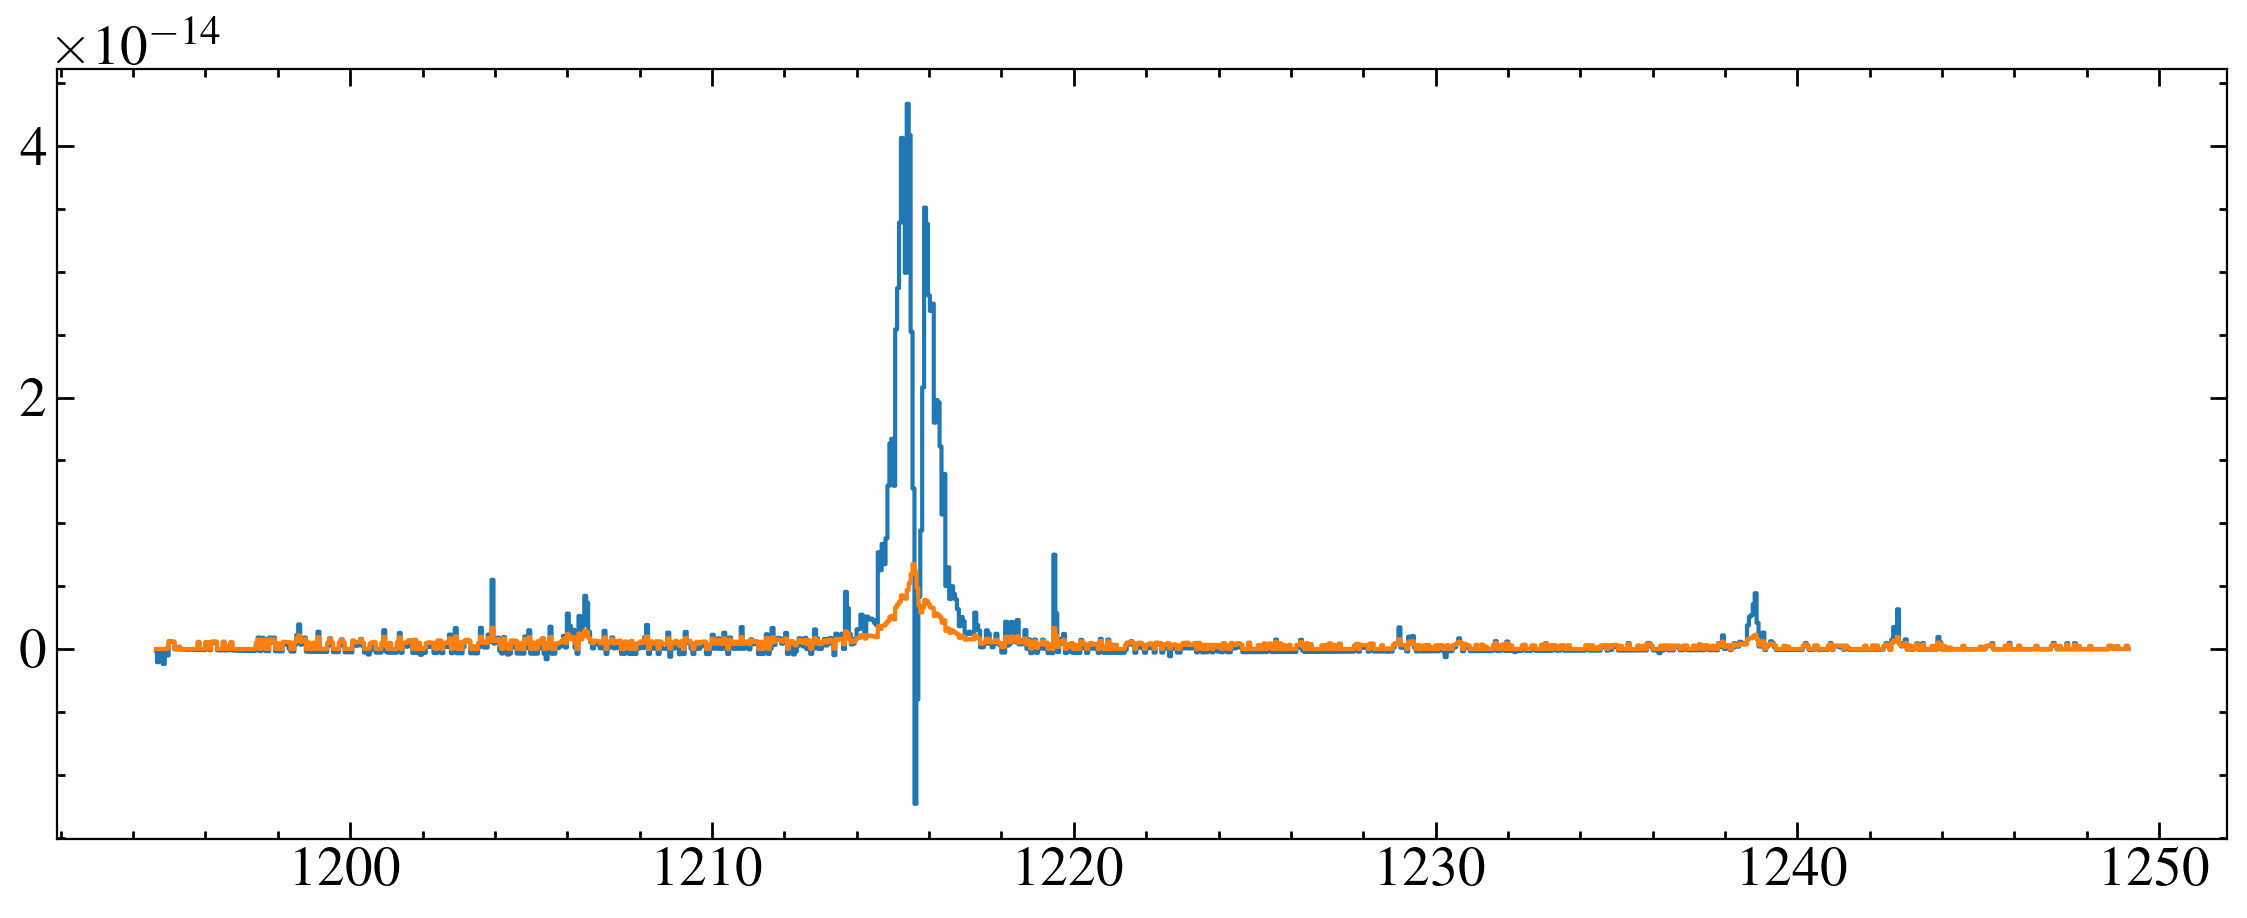

555.3782
odlm35040


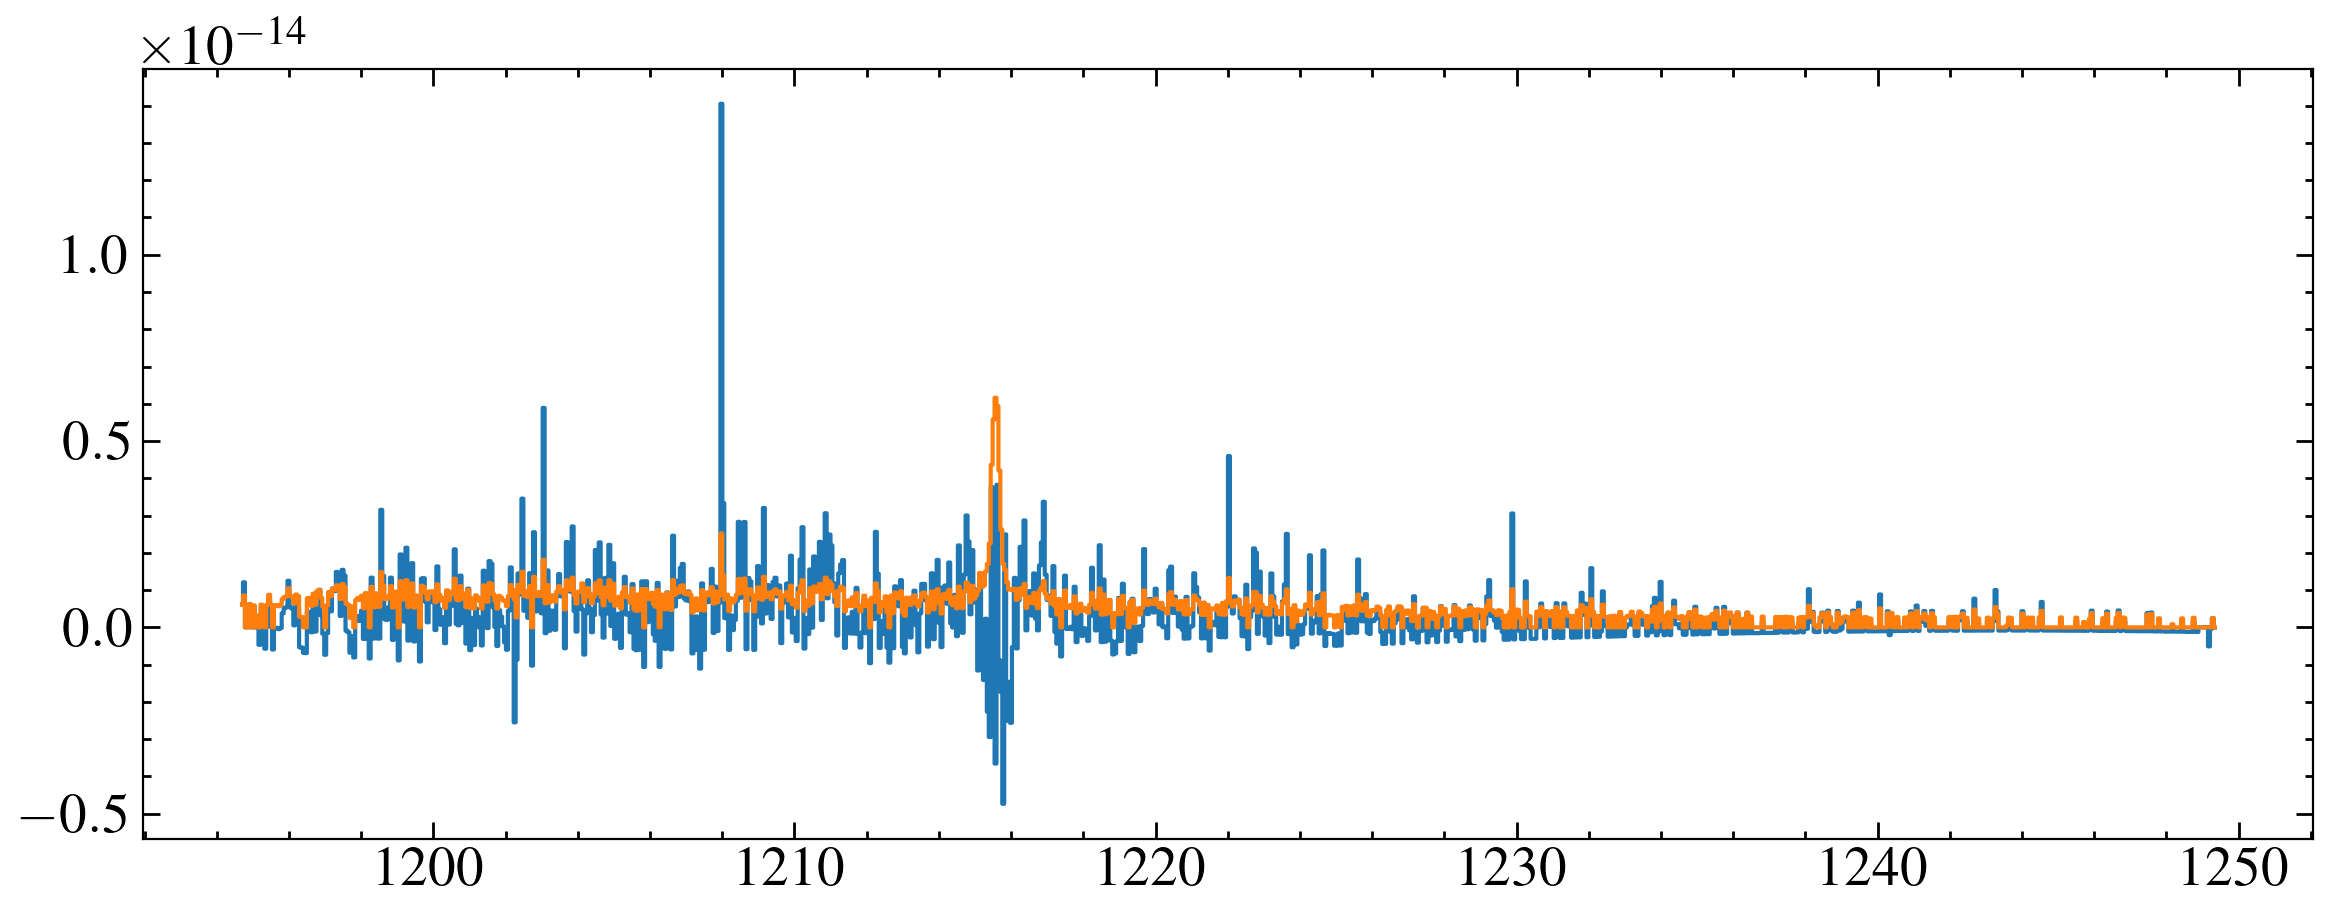

In [20]:
for x in x1ds:
    hdr = fits.getheader(x, 0)
    if hdr['OPT_ELEM'] == 'G140M':
        data = fits.getdata(x, 1)[0]
        print(data['A2Center'])
        print(fits.getheader(x,0)['ROOTNAME'])
        w, f, e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
        
        plt.step(w, f, where='mid')
        plt.step(w, e, where='mid')
        
        plt.show()

        